# Limits on Random Forest

See discussion in [Lesson6](https://www.youtube.com/watch?v=BFIYUvBRTpE&feature=youtu.be), 2nd half.

In [1]:
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

We create a synthetic data set that has a simple linear relationship.
We pretend it's like a time series.
We create some `x` values using `linspace`,
which creates evenly spaced data between start and stop.
By default 50 observations. 

In [2]:
import numpy as np

In [3]:
x = np.linspace(0,1); x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

We create a dependent variable `y`, let's assume there's just a linear relationship
between `x` and `y` and let's add a little randomness to it right.
So uniform random between low and high, add somewhere between -0.2 and 0.2 
Next thing we need is a shape, i.e., what dimensions we want these random numbers to be.
We want them to be in the same shape as `x.shape`.

In [4]:
y = np.random.uniform(-0.2,0.2, x.shape); y

array([ 0.09407309,  0.18567407,  0.12436314,  0.16750698,  0.05777909,
       -0.11997177,  0.04438375, -0.1142768 ,  0.07757325, -0.17121159,
       -0.13227678, -0.09941014,  0.16692003, -0.16914262,  0.10544119,
        0.17946995,  0.0433974 ,  0.00421567, -0.05924304,  0.03757223,
       -0.18908449, -0.02685977,  0.10116278,  0.02698587,  0.19907789,
        0.10658279,  0.06276655,  0.14283472, -0.02001296, -0.13937974,
        0.0266366 ,  0.13030087, -0.02561303, -0.15653236, -0.17726356,
        0.13148433,  0.08187373,  0.04267618,  0.09102226, -0.13498956,
        0.04509929, -0.04791949, -0.06790463,  0.16203804, -0.18941155,
       -0.17885645, -0.19080804, -0.13647422, -0.13253499,  0.02238603])

Now we plot those 

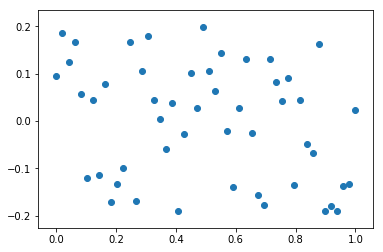

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [6]:
x.shape

(50,)

In [7]:
len(x.shape)  # notice that x rank = len(x.shape) == 1

1

How do we turn a one-dimensional array into a two-dimensional array?
There's a couple of ways we can do it.
Here we slice it right.
- `:` means give me everything in that axis.
- `:, None` means give me everything in the first axis and `None` is a special indexer
which means add a unit axis.
So this returns the shape `(50, 1)`, i.e., rank 2.

In [8]:
x[:,None].shape #this is of rank 2, by adding None we introduced a new axis.  50 rows, 1 column

(50, 1)

In [9]:
x[None,:].shape  #has rank 2, with 1 row and 50 columns   (we want the other)

(1, 50)

In [10]:
x[None].shape  #equivalent to x[None,:].shape 

(1, 50)

In [11]:
x[...,None].shape  # ... means as many dimensions as needed, so the new dimension is always the last one

(50, 1)

Below adds it in the last dimension.
`...` means, "as many dimensions as needed".

In [12]:
x1 = x[...,None]

In [13]:
x_trn, x_val = x1[:40], x1[40:]
y_trn, y_val = y[:40], y[40:]

In [14]:
m = RandomForestRegressor().fit(x_trn,y_trn)

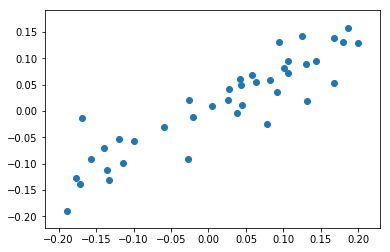

In [15]:
plt.scatter(y_trn, m.predict(x_trn))   # should look as before, but with some randomness

Below is just returning the average of nearby observations where nearby.
Because RF does just that, i.e., it **can not extrapolate to the future**.

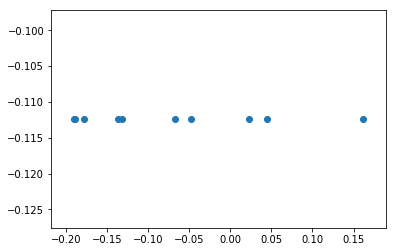

In [16]:
plt.scatter(y_val, m.predict(x_val))

One way to deal with this is to use a neural net.
Another is to fit a time series, and then D-trend it.
We will end up with D-trended dots, and then use the RF to predict those.
<br>
Imagine that your RF was trying to predict data, eg 2 states, blue and red.
If we try to use a RF it's going to do a bad job, because time is going to much more important.
We are not gonna see the other relationships in the Rf until we have dealt and kill every tree deals
with time.
One way to fix this is with a Gradient Boosting Machine (GBM)
A GBM creates a little tree and runs everything through that first little tree 
which could be like the time tree and then it calculates the residuals,
and then the next little tree just predicts the residuals.
So it'd be like D-trending.
GBM can handle this.
GBMs still can't extrapolate to the future, 
but at least they can deal with time-dependent data more conveniently.